<a href="https://colab.research.google.com/github/1am8anana/Tesla_Stock_Price_Prediction_using_Facebook_prophet/blob/main/Forecasting_automate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon (AMZN) Stock Price prediction using Facebook Prophet (But auto)

### Importing all the necessary Libraries

In [3]:
# Necessary libraries = Pandas, fbprophet and plotly
# pandas: for Data Manipulation and analysis
import pandas as pd
# fbprophet: for Forcasting
from prophet import Prophet
# plotly: for Data visualization
import plotly.express as px
import plotly.io as pio
pio.renderers.default='colab'

### Importing the Dataset and Exploring it

In [4]:
# read_csv function from pandas
df = pd.read_csv('AMZN.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-17,88.773499,92.889000,84.461998,90.391998,90.391998,218342000
1,2020-03-18,87.500000,92.083000,87.250000,91.500000,91.500000,192904000
2,2020-03-19,93.000000,97.250000,91.632500,94.046501,94.046501,207998000
3,2020-03-20,96.315498,97.849998,91.036499,92.304497,92.304497,196358000
4,2020-03-23,91.387497,95.970001,90.599998,95.141502,95.141502,156170000
...,...,...,...,...,...,...,...
247,2021-03-10,154.922501,155.822998,151.502502,152.882004,152.882004,60250000
248,2021-03-11,155.200500,156.589005,154.146500,155.679504,155.679504,55528000
249,2021-03-12,153.750000,154.949005,152.274994,154.474503,154.474503,48438000
250,2021-03-15,153.728500,154.112000,151.604507,154.084000,154.084000,58272000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,146.636385,148.516230,144.515526,146.545488,146.545488,9.343610e+07
std,21.394759,21.336638,21.014379,21.036693,21.036693,3.496016e+07
min,87.500000,92.083000,84.461998,90.391998,90.391998,2.903800e+07
25%,131.937500,132.923996,130.684754,131.727623,131.727623,6.659350e+07
50%,156.125504,157.889999,154.284752,155.694999,155.694999,8.566900e+07
75%,160.450871,162.355881,158.278626,160.265873,160.265873,1.118900e+08
max,177.350006,177.612503,174.334503,176.572495,176.572495,2.407640e+08


### Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [7]:
# Line graph, Area graph, box plot (Analyzing proce and volume)

In [8]:
px.area(df, x='Date', y='Close')

In [9]:
px.line(df, x='Date', y='Close')

In [10]:
px.area(df, x='Date', y='Volume')

In [11]:
px.bar(df, y='Volume')

In [12]:
px.box(df, y='Close')

### Understanding Facebook Prophet

In [13]:
# Facebook Prophet

# Accurate and Fast : It is accurate and generate results very fast
# Reliable : Facebook Company itself uses Prophet for Internal forecasting
# Fully Automatic : Works with missing data & No need to perform extensive data Preprocessing
# Domain Knowledge Integration : Forecasting can be made better by adding domain knowledge expertise like holidays & patterns
# Available in R and Python: We will be using Python Programming Language

### Data Preperation

In [14]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns)
ndf.head(5)

,Date,Close
0,2020-03-17,90.391998
1,2020-03-18,91.500000
2,2020-03-19,94.046501
3,2020-03-20,92.304497
4,2020-03-23,95.141502


In [15]:
prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})
prophet_df.head(5)

,ds,y
0,2020-03-17,90.391998
1,2020-03-18,91.500000
2,2020-03-19,94.046501
3,2020-03-20,92.304497
4,2020-03-23,95.141502


### Creating Facebook Prophet Model

In [16]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vk9rlu_/904b0vtq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vk9rlu_/56spm853.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27249', 'data', 'file=/tmp/tmp7vk9rlu_/904b0vtq.json', 'init=/tmp/tmp7vk9rlu_/56spm853.json', 'output', 'file=/tmp/tmp7vk9rlu_/prophet_model1ra9i72y/prophet_model-20240724214208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:42:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:42:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Forecasting

In [17]:
# period: for days like 30 = 1 month
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-17,93.444636,87.183997,101.146328,93.444636,93.444636,0.744244,0.744244,0.744244,0.744244,0.744244,0.744244,0.0,0.0,0.0,94.188880
1,2020-03-18,93.901067,88.271327,101.494582,93.901067,93.901067,1.046227,1.046227,1.046227,1.046227,1.046227,1.046227,0.0,0.0,0.0,94.947293
2,2020-03-19,94.357497,88.380051,101.823630,94.357497,94.357497,0.926039,0.926039,0.926039,0.926039,0.926039,0.926039,0.0,0.0,0.0,95.283536
3,2020-03-20,94.813927,88.284002,101.971910,94.813927,94.813927,0.024315,0.024315,0.024315,0.024315,0.024315,0.024315,0.0,0.0,0.0,94.838242
4,2020-03-23,96.183218,89.619831,103.232236,96.183218,96.183218,0.460293,0.460293,0.460293,0.460293,0.460293,0.460293,0.0,0.0,0.0,96.643510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2021-04-11,157.387237,148.911087,162.934863,156.840181,157.969530,-1.600559,-1.600559,-1.600559,-1.600559,-1.600559,-1.600559,0.0,0.0,0.0,155.786677
278,2021-04-12,157.374038,150.608108,164.995661,156.784103,158.007491,0.460293,0.460293,0.460293,0.460293,0.460293,0.460293,0.0,0.0,0.0,157.834331
279,2021-04-13,157.360839,150.971971,165.122346,156.721305,158.031463,0.744244,0.744244,0.744244,0.744244,0.744244,0.744244,0.0,0.0,0.0,158.105083
280,2021-04-14,157.347641,151.566213,164.907083,156.673624,158.052023,1.046227,1.046227,1.046227,1.046227,1.046227,1.046227,0.0,0.0,0.0,158.393868


In [19]:
px.line(forecast, x='ds', y='yhat')

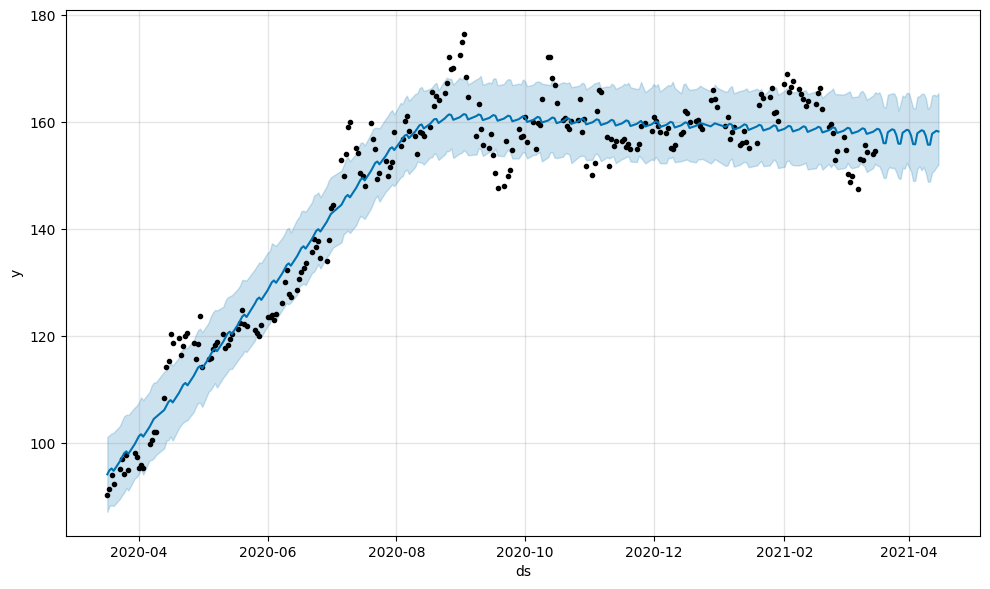

In [20]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')
# black dot is the actual prices
# blue line is the our forecasting by prophet model

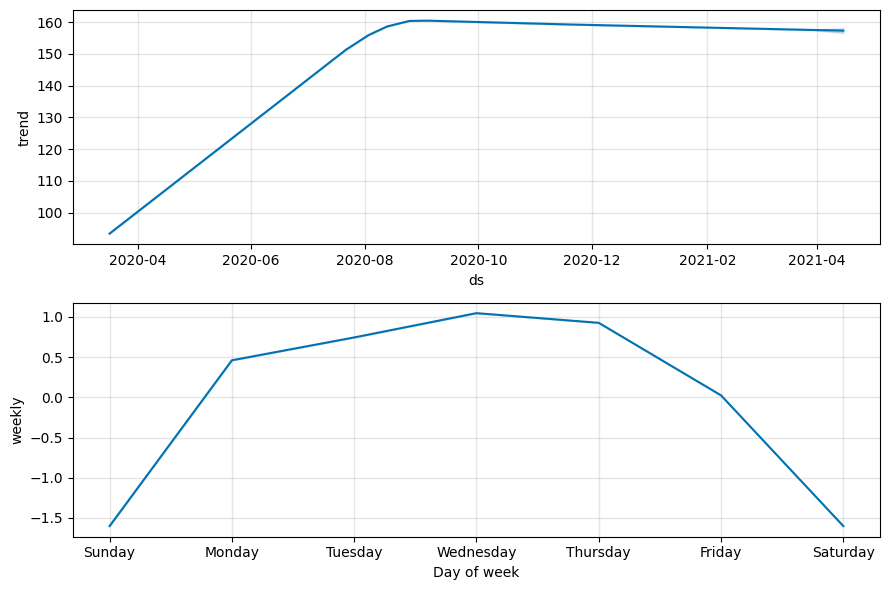

In [21]:
figure2 = model.plot_components(forecast)

### Downloading the Forecast data

In [22]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>